In [52]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('C://Users//ALEXEY/Downloads/lesson_3_data__1_.csv', encoding='windows-1251')

In [4]:
df

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48124,5142333,660820070702005033693,6608,2007/07/02,0.575660,45518841,4551884,22115,101070640100,1010706401,...,10107064,10107,101,1,0.71,1.0,22115,FIDEOS 0 500 G Brand_4,PASTA ALIMENTICIA SE,pasta
48125,5142335,660820070618006015969,6608,2007/06/18,0.829954,110824211,11082421,22124,101070640100,1010706401,...,10107064,10107,101,1,0.71,1.0,22124,PLUMAS 3 500 G Brand_4,PASTA ALIMENTICIA SE,pasta
48126,5150526,670120071110001433949,6701,2007/11/10,0.384120,1408670389,999860498,21818,101070640100,1010706401,...,10107064,10107,101,1,0.48,1.0,21818,MACARRONES 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
48127,5150527,670120071110001433949,6701,2007/11/10,0.384120,1408670389,999860498,21814,101070640100,1010706401,...,10107064,10107,101,1,0.48,1.0,21814,SPAGHETTI 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta


In [5]:
user_df = df[['tc', 'art_sp']]

In [6]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [7]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})

In [8]:
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [11]:
def split_brand(brand_info):
    return brand_info.split(' ')[-1]

In [12]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [ ]:
#user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])


Разведовательный анализ


In [24]:
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': 'count'}) \
    .rename(columns={'brand_name': 'purchases'}) \
    .query('purchases>=5')

In [33]:
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})

In [30]:
lovley_brand_purcheses_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'lovely_brand', 'brand_info': 'lovley_brand_purcheses'})

In [44]:
loyality_df = users_purchases.merge(users_unique_brands, on='user_id') \
    .merge(lovley_brand_purcheses_df, on='user_id')

In [45]:
loyality_df

,user_id,purchases,unique_brands,lovely_brand,lovley_brand_purcheses
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2
...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5
3379,1408783189,10,2,Store_Brand,8
3380,1408783379,6,2,Brand_1,4
3381,1408798879,8,3,Store_Brand,4


In [49]:
loyal_users = loyality_df[loyality_df.unique_brands==1]
loyal_users

,user_id,purchases,unique_brands,lovely_brand,lovley_brand_purcheses
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [50]:
loyality_df['loyality_score'] = loyality_df.lovley_brand_purcheses / loyality_df.purchases

In [51]:
loyality_df

,user_id,purchases,unique_brands,lovely_brand,lovley_brand_purcheses,loyality_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000
...,...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5,1.000000
3379,1408783189,10,2,Store_Brand,8,0.800000
3380,1408783379,6,2,Brand_1,4,0.666667
3381,1408798879,8,3,Store_Brand,4,0.500000


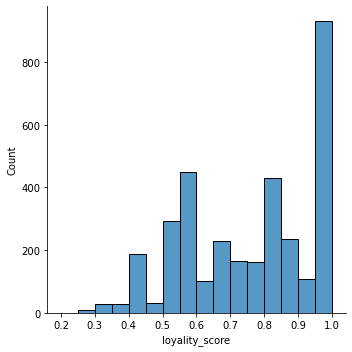

In [56]:
ax = sns.displot(loyality_df.loyality_score)

In [63]:
brands_loyality = loyality_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyality_score': 'median', 'user_id': 'count'})

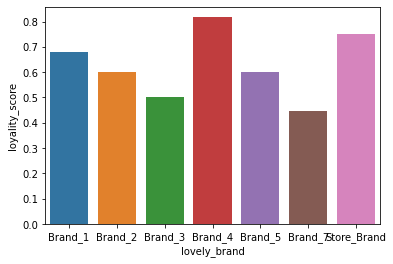

In [68]:
ax = sns.barplot(x='lovely_brand', y='loyality_score', data =brands_loyality )

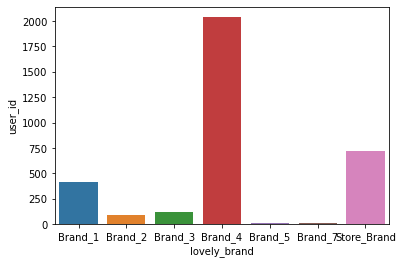

In [69]:
ax = sns.barplot(x='lovely_brand', y='user_id', data =brands_loyality )